In [55]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, confusion_matrix

In [27]:
data = pd.read_csv('/Users/navamongkoltongta/.kaggle/StrokePrediction/healthcare-dataset-stroke-data.csv')

In [28]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
data['bmi'].fillna((data['bmi'].mean()),inplace=True)

In [31]:
le = LabelEncoder()

cat_cols = data.select_dtypes(object)
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [32]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y = data[['stroke']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
model = RandomForestClassifier()

In [67]:
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [68]:
model.score(X_test, y_test)

0.9419439008480104

In [69]:
pred = model.predict(X_test)

In [70]:
cm = confusion_matrix(y_test, pred)

<AxesSubplot:>

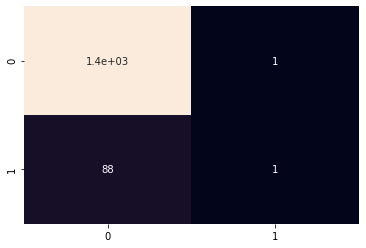

In [71]:
sns.heatmap(cm, annot = True , cbar=False)

In [72]:
acc = accuracy_score(pred, y_test)
acc

0.9419439008480104

In [73]:
cfr = classification_report(pred, y_test)
print(cfr)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1531
           1       0.01      0.50      0.02         2

    accuracy                           0.94      1533
   macro avg       0.51      0.72      0.50      1533
weighted avg       1.00      0.94      0.97      1533

